# Análisis exploratorio de datos

## Librerias

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, time
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

## Lectura de datos

In [116]:
df = pd.read_csv('./data/processed/dataset_preprocessed.csv')

# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,time,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,14:20,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,14:20,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,17:00,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,16:10,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,16:00,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


## Descripción de los Datos

In [117]:
columns = list(df.columns)
print(columns)

['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygon

**Variables:** ['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.1', 'SPA1', 'SPA2', 'Lotus', 'Bidens.leptocephala', 'SPA5', 'SPA6', 'Tephrosia', 'Asteraceae.Uropappus lindleyi', 'SPA9', 'SPA10', 'Ziziphus.obtisufolia', 'Aristida', 'Diodia.teres', 'Bothriochloa', 'Pinus.dulis', 'Paspalum.distichum', 'SPA17', 'SPA18', 'SPA19', 'Euphorbia.exstipulata', 'SPA21', 'Asteracea', 'SPA23', 'SPA24', 'Chilopsis.linearis', 'Sorghum.halepense', 'Amaranthus', 'Setaria nigricans', 'SPA29', 'SPA30', 'SPA31', 'SPA32', 'SPA33', 'SPA34', 'SPA35', 'SPA36', 'SPA37', 'SPA38', 'SPA39', 'SPA40', 'Agave.or.Yucca', 'SPA42', 'SPA43', 'SPA44', 'Sida', 'SPA46', 'SPA47', 'Tragia', 'Lupinus.2', 'SPA50', 'SPA51', 'SPA52', 'SPA53', 'SPA54', 'SPA55', 'Amaranthus.1', 'Desmodium.1', 'Bothriochloa.1', 'Euphorbia.2', 'SPA60', 'SPA61', 'SPA62', 'Phaseolus.1', 'SPA64', 'SPA65', 'Arachnida', 'Juniperus prob. deppeana', 'time', 'covey', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']

In [118]:
df.describe()

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,Arachnida,Juniperus prob. deppeana,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.059958,0.135306,0.183276,0.260930,0.398215,0.014997,0.000109,0.108142,0.048888,0.011067,...,0.000700,0.0,206.728500,437.018182,13.873466,1708.377273,32.217283,-108.940782,0.577650,1.044265
std,1.807237,0.817760,0.605746,0.737829,1.199566,0.063786,0.001246,0.385100,0.364621,0.113797,...,0.010383,0.0,178.399251,79.049142,2.088660,224.737164,0.814838,1.535809,0.490004,0.360545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.581442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,80.172500,376.000000,12.379167,1566.750000,31.479233,-110.585248,0.131294,0.783493
50%,1.687295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,171.920000,422.500000,14.354167,1658.000000,31.787750,-108.952256,0.534254,1.057318
75%,3.000075,0.000000,0.000000,0.000000,0.057800,0.000000,0.000000,0.020000,0.000000,0.000000,...,0.000000,0.0,272.860000,518.000000,15.543750,1901.000000,32.880501,-107.721568,0.845094,1.362937
max,9.758400,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,...,0.154000,0.0,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.053079,1.796301


### Duplicado de datos

In [119]:
# Verifica si existen registros duplicados
df.duplicated().value_counts()

False    220
Name: count, dtype: int64

### Datos Faltantes

In [120]:
# Verificar si hay datos faltantes o nulos en cada columna
missing_data = df.isnull().sum()

# Filtrar las columnas que tienen datos faltantes
missing_columns = missing_data[missing_data > 0]

# Mostrar el número de valores faltantes por columna
print(missing_columns)

# Verificar si hay alguna columna con datos faltantes
has_missing_data = missing_data.any()

edad    1
dtype: int64


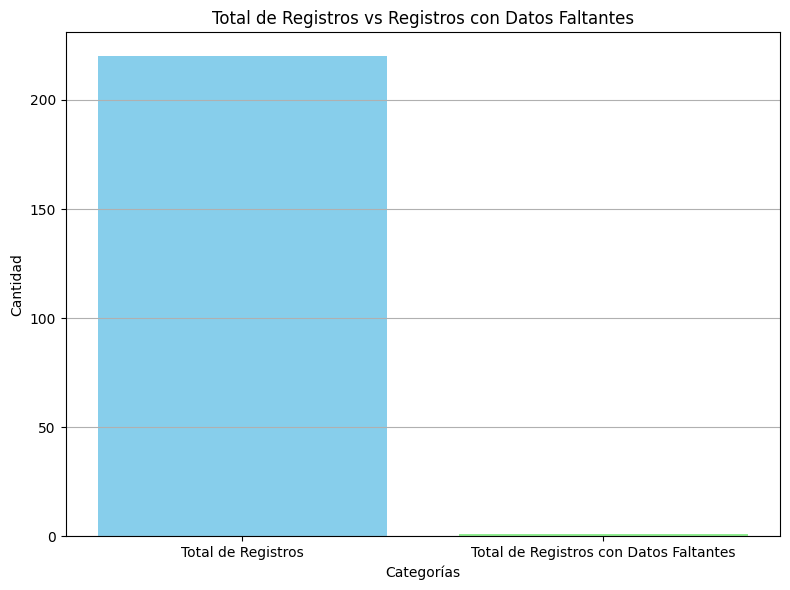

Total de Datos Faltantes: 220
Total de Registros con Datos Nulos: 1


In [121]:
# Calcular el total de datos faltantes en todo el DataFrame
total_faltantes = df.shape[0]

# Contar la cantidad de registros que tienen al menos un dato nulo en alguna columna
registros_con_nulos = df[df.isnull().any(axis=1)].shape[0]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Total de Registros', 'Total de Registros con Datos Faltantes'], [total_faltantes, registros_con_nulos], color=['skyblue', 'lightgreen'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Total de Registros vs Registros con Datos Faltantes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar el total de datos faltantes y la cantidad de registros con datos nulos
print(f'Total de Datos Faltantes: {total_faltantes}')
print(f'Total de Registros con Datos Nulos: {registros_con_nulos}')


### Por tipos de variables

#### Elementos en la dieta de la codorniz

In [122]:
print(columns[5:-11])

['Oxalis', 'Quercus', 'Cyp.bulb', 'Phaseolus', 'Tephoria', 'Caracoles', 'Insectos', 'Physalis', 'Vitis.arizonica', 'Lupinus', 'Lotus.wrightii', 'Cyp.rizo', 'Commelina.dianthifolia', 'Kallstroemia.parviflora', 'Fabacea', 'Ipomoea', 'Desmodium', 'Euphorbia probably E. bilobata', 'Talinum.aurantiacum', 'SP17', 'Heterosperma.pinnatum', 'SP19', 'Desmanthus cooleyi', 'Celtis.reticulata', 'Panicum.hirticaule', 'Setaria', 'Malvacea', 'Cyperus.fendlerianus', 'SP26', 'Setaria.1', 'SP28', 'Cryptantha.cinerea', 'Sphaeralcea.fendleri', 'Hymenopappus.flavescens', 'Solaneaceae', 'Euphorbia', 'SP34', 'Piptochaetium.fimbriatum', 'Acalypha.neomexiacana', 'Fabaceae', 'Lupinus.neomexicanus', 'Mirabilis.longiflora', 'SP44', 'Prunus.virginiana', 'SP46', 'Urochloa', 'Cyperaceae', 'Pinus.edulis', 'Fabacea.1', 'SP51', 'SP52', 'Calliandra.humilis', 'Fabaceae.1', 'Solanum', 'Calliandra.eriophylla', 'Desmanthus.cooleyi', 'Sp59', 'Croton.pottsii', 'Lupinus.1', 'Polygonaceae', 'Euphorbia.1', 'Calliandra', 'Solanum.

In [123]:
# Crear un nuevo DataFrame con las columnas especificadas
df_dieta = df[columns[5:-11]].copy()
df_dieta.head()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida
0,9.7584,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9632,0.0,0.000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8238,0.0,0.000,0.6148,0.0726,0.0,0.0514,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.7076,0.0,0.000,0.0000,0.0000,0.0,0.7900,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.2011,0.0,0.778,0.3908,0.0000,0.0,0.0027,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df_dieta.describe()

,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,Lupinus,...,Desmodium.1,Bothriochloa.1,Euphorbia.2,SPA60,SPA61,SPA62,Phaseolus.1,SPA64,SPA65,Arachnida
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.000000
mean,0.135306,0.183276,0.260930,0.398215,0.014997,0.000109,0.108142,0.048888,0.011067,0.000157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000700
std,0.817760,0.605746,0.737829,1.199566,0.063786,0.001246,0.385100,0.364621,0.113797,0.002326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.057800,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,0.034500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154000


##### Variables de alimentos 

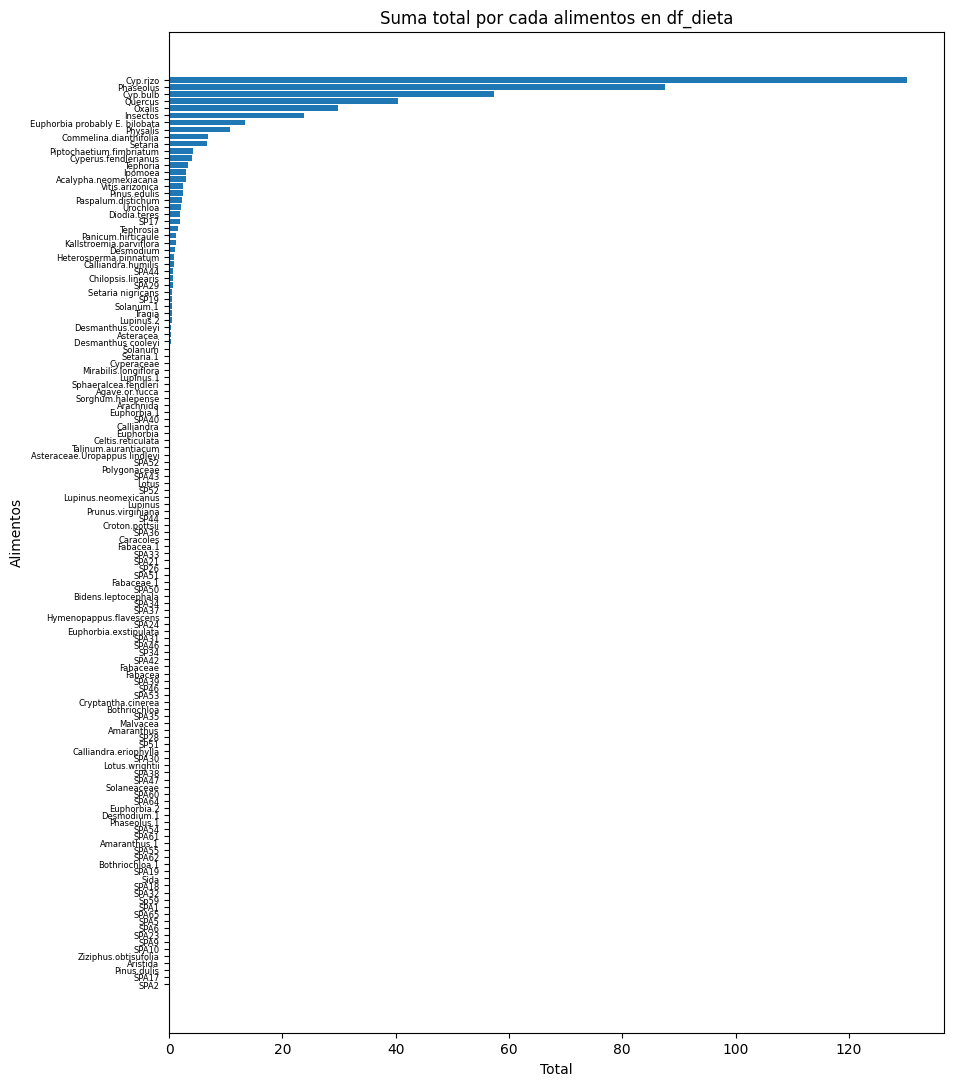

In [196]:
# Calcular los totales para cada columna y ordenar de mayor a menor
column_totals_sorted = df_dieta.sum().sort_values(ascending=True)

# Crear una gráfica de barras verticales ordenada de mayor a menor
plt.figure(figsize=(10, 13))
plt.barh(column_totals_sorted.index, column_totals_sorted.values)

# Ajustar el tamaño de la fuente de los nombres de las variables
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)

# Añadir etiquetas y título
plt.xlabel('Total')
plt.ylabel('Alimentos')
plt.title('Suma total por cada alimentos en df_dieta')


# plt.savefig('./Graficos/sum_alimentos_ds.png', format='png')

# Guardar la gráfica
plt.savefig('./Graficos/sum_alimentos_ds.png')

# Mostrar la gráfica
plt.show()


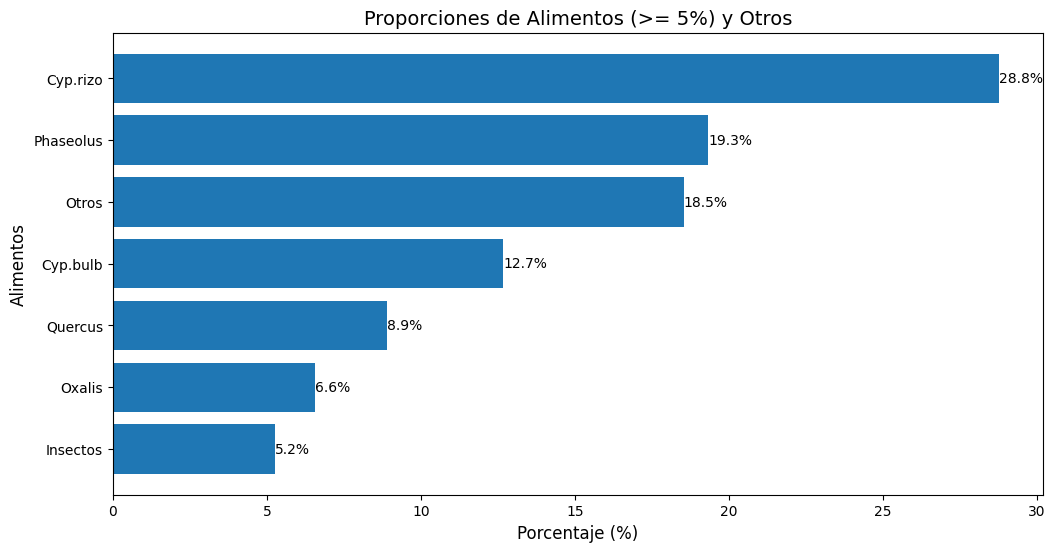

In [197]:
# Calcular los porcentajes para cada columna
column_percentages = df_dieta.sum() / df_dieta.sum().sum()

# Filtrar los alimentos que tienen al menos el 10% de la proporción
column_percentages_filtered = column_percentages[column_percentages >= 0.05]

# Calcular el porcentaje total de "Otros"
otros_percentage = 1 - column_percentages_filtered.sum()

# Crear un nuevo DataFrame con los alimentos que cumplen el criterio y "Otros"
df_plot = pd.concat([column_percentages_filtered, pd.Series({'Otros': otros_percentage})])

# Ordenar los porcentajes de mayor a menor
df_plot_sorted = df_plot.sort_values(ascending=True)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
bars = plt.barh(df_plot_sorted.index, df_plot_sorted.values * 100, height=0.8)  # Multiplicar por 100 para obtener el porcentaje en lugar de la fracción

# Ajustar el espacio entre las etiquetas y las barras
plt.yticks(fontsize=10)  # Ajustar el valor de pad según sea necesario

# Añadir etiquetas y título
plt.ylabel('Alimentos', fontsize=12)
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.title('Proporciones de Alimentos (>= 5%) y Otros', fontsize=14)

# Agregar los porcentajes al final de cada barra
for bar, percentage in zip(bars, df_plot_sorted.values * 100):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', ha='left', va='center')

# Guardar la gráfica
plt.savefig('./Graficos/principales-5%-alimentos_ds.png')

# Mostrar la gráfica
plt.show()

#### Variables Climatologicas y del individuo

In [130]:
print(columns[:5] + columns[-10:])

['id', 'edad', 'sexo', 'estado', 'peso total', 'time', 'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon', 'hcrop', 'hland', 'gap']


In [131]:
# Crear una lista con las columnas 
nuevas_columnas = columns[:5] + columns[-10:]

# Crear un nuevo DataFrame con las columnas especificadas
df_all = df[nuevas_columnas].copy()

In [132]:
df_all.head()

,id,edad,sexo,estado,peso total,time,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,14:20,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,14:20,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,17:00,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,16:10,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,16:00,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


In [133]:
df_all.describe()

,peso total,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.059958,206.728500,437.018182,13.873466,1708.377273,32.217283,-108.940782,0.577650,1.044265
std,1.807237,178.399251,79.049142,2.088660,224.737164,0.814838,1.535809,0.490004,0.360545
min,0.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.072099,0.000000,0.222691
25%,0.581442,80.172500,376.000000,12.379167,1566.750000,31.479233,-110.585248,0.131294,0.783493
50%,1.687295,171.920000,422.500000,14.354167,1658.000000,31.787750,-108.952256,0.534254,1.057318
75%,3.000075,272.860000,518.000000,15.543750,1901.000000,32.880501,-107.721568,0.845094,1.362937
max,9.758400,774.840000,620.000000,17.312500,2518.000000,34.037969,-105.354701,2.053079,1.796301


In [134]:
# Mostrar los tipos de datos de cada columna
print(df_all.dtypes)


id              object
edad            object
sexo            object
estado          object
peso total     float64
time            object
dist camino    float64
ppanual17      float64
tmedia17       float64
altitud        float64
lat            float64
lon            float64
hcrop          float64
hland          float64
gap             object
dtype: object


##### Tiempo vs Peso total

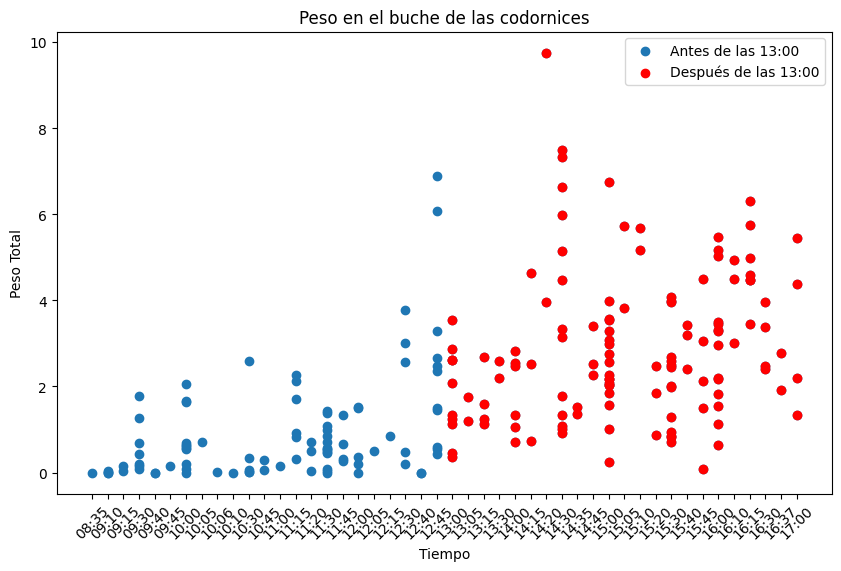

In [218]:
# Crear la gráfica de dispersión para todos los puntos
plt.figure(figsize=(10, 6))
df_sorted = df_all.sort_values(by='time')
plt.scatter(df_sorted['time'], df_sorted['peso total'], label='Antes de las 13:00')

# Filtrar los puntos que tienen un tiempo mayor o igual a las 13:00
df_mayor_13 = df_sorted[df_sorted['time'] >= '13:00']

# Crear la gráfica de dispersión para los puntos >= 13:00
plt.scatter(df_mayor_13['time'], df_mayor_13['peso total'], color='red', label='Después de las 13:00')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Peso Total')
plt.title('Peso en el buche de las codornices')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Guardar la gráfica
plt.savefig('./Graficos/PesoTotal_vs_Tiempo.png')

# Mostrar la gráfica
plt.show()

#### DSCAN

In [45]:
# Supongamos que df es tu DataFrame original
# mputar valores NaN con la mediana
df_imputed = df.fillna(0)

# Paso 2: Eliminar columnas de tipo object
df_all = df_imputed.select_dtypes(exclude=[object])

In [46]:
df_all

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
0,9.7584,9.7584,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
1,3.9632,3.9632,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1420.0,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600
2,5.4562,3.8238,0.0,0.0000,0.6148,0.0726,0.0,0.0514,0.0000,0.0,...,1700.0,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916
3,4.4976,3.7076,0.0,0.0000,0.0000,0.0000,0.0,0.7900,0.0000,0.0,...,1610.0,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466
4,5.4630,2.2011,0.0,0.7780,0.3908,0.0000,0.0,0.0027,0.0000,0.0,...,1600.0,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.3501,0.0000,0.0,0.3501,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812
315,0.1977,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0339,0.0,...,1230.0,3.0,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301
316,2.6084,0.0000,0.0,2.5800,0.0000,0.0000,0.0,0.0000,0.0000,0.0,...,1300.0,12.0,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812
317,7.3265,0.0000,0.0,0.0000,7.3265,0.0000,0.0,0.0000,0.0000,0.0,...,1430.0,8.0,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439


In [47]:
# Estandarizar los datos (excepto la columna 'covey')
features = df_all.drop(columns='covey')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

X_pca[:2]

array([[-2.88542542, -2.72304069],
       [-2.64070986, -2.39339241]])

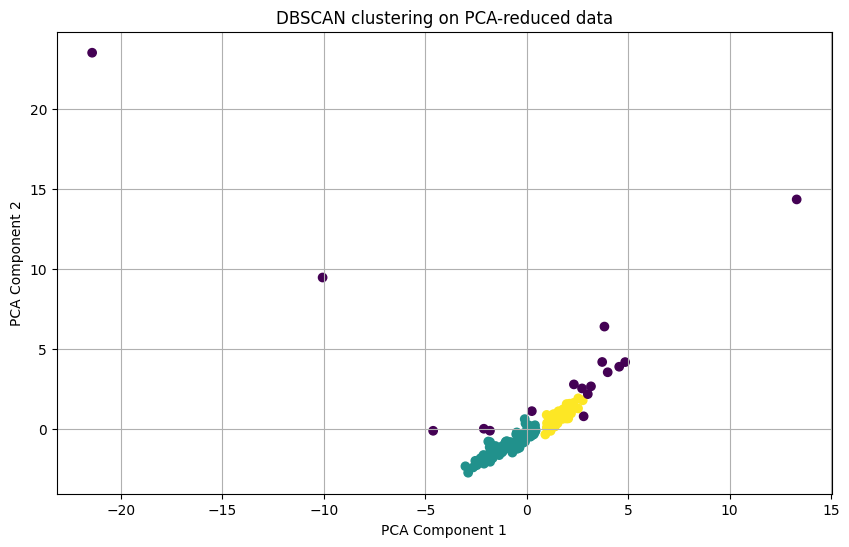

In [48]:
# Aplicar DBSCAN a los componentes principales
db = DBSCAN(eps=0.5, min_samples=5).fit(X_pca)

# Agregar etiquetas al DataFrame original
df_imputed['cluster'] = db.labels_

# Contar el número de puntos en cada cluster
cluster_counts = df_imputed['cluster'].value_counts()

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_imputed['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN clustering on PCA-reduced data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()